# PyROOT + IQTools example

In [1]:
from ROOT import TCanvas, TFile
%jsroot on

from iqtools import *
%matplotlib inline

Welcome to JupyROOT 6.22/06


In [2]:
filename = 'p_400_MeV_u_332_uA_0.tiq'
nframes = 200
lframes  = 1024
iq = get_iq_object(filename)
iq.read(1)

In [3]:
iq.read_samples(lframes * nframes)
xx, yy, zz = iq.get_spectrogram(lframes = lframes, nframes = nframes)

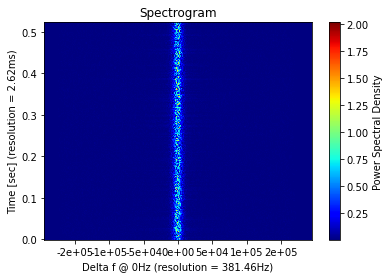

In [4]:
plot_spectrogram(xx, yy, zz)

In [5]:
h3 = get_root_th2d(xx, yy, zz)

In [6]:
c = TCanvas("myCanvasName","The Canvas Title",800,600)
c.Divide(1,2)
c.cd(1)
h3.Draw('zcol')
c.cd(2)
h3.ProjectionX().DrawClone()
c.Draw()

In [8]:
ff = TFile( 'blah.root', 'RECREATE' )
h3.Write()
h3.ProjectionX().Write()
ff.Close()